<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/MNISTplay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

5
0
4
1


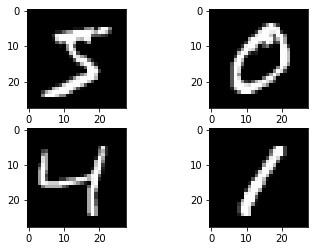

In [15]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
print(y_train[0])
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
print(y_train[1])
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
print(y_train[2])
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
print(y_train[3])

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [18]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [20]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

ValueError: ignored

In [1]:
# Larger CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 30s 100ms/step - loss: 0.3655 - accuracy: 0.8879 - val_loss: 0.0851 - val_accuracy: 0.9734
Epoch 2/10
300/300 [==============================] - 30s 99ms/step - loss: 0.1008 - accuracy: 0.9699 - val_loss: 0.0541 - val_accuracy: 0.9829
Epoch 3/10
300/300 [==============================] - 30s 99ms/step - loss: 0.0760 - accuracy: 0.9773 - val_loss: 0.0443 - val_accuracy: 0.9856
Epoch 4/10
300/300 [==============================] - 30s 98ms/step - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0417 - val_accuracy: 0.9857
Epoch 5/10
300/300 [==============================] - 29s 98ms/step - loss: 0.0511 - accuracy: 0.9839 - val_loss: 0.0351 - val_accuracy: 0.9882
Epoch 6/10
300/300 [==============================] - 29s 98ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0275 - val_accuracy: 0.9899
Epoch 7/10
300/300 [==============================] - 29s 98ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0288 - val_accuracy

In [2]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


In [4]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 3.9MB/s 
     |████████████████████████████████| 137.3MB 119kB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 256kB 49.1MB/s 
     |████████████████████████████████| 921kB 48.4MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=43560dfe8aa3ba1c37092abdbd054144dc17f4e23c9e1530bd847df3132b03a6
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation

In [5]:
import tensorflowjs as tfjs

In [7]:
tfjs.converters.save_keras_model(model, 'models')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [9]:
from google.colab import files
files.download('models')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>